#Yoğunluk Seviyesi Dilimleme

Giriş olarak 8-bit gri tonlamalı bir görüntü okunmuştur.

Yoğunluk seviyesi dilimleme işlemi için alt ve üst sınırlar [100, 150] olarak belirlenmiştir.

Bu aralıkta yer alan piksel değerleri olduğu gibi korunmuş, aralık dışında kalan tüm piksel değerleri 0 (siyah) yapılmıştır.

İşlem sonucunda elde edilen görüntü, orijinal görüntü ile yan yana görselleştirilerek karşılaştırılmıştır.

Bu çalışmada kullanılan yoğunluk seviyesi dilimleme işlemi aşağıdaki gibi
ifade edilebilir:

$$
g(x,y) =
\begin{cases}
f(x,y), & 100 \leq f(x,y) \leq 150 \\
0,      & \text{aksi halde}
\end{cases}
$$

Burada:

- $f(x,y)$ giriş görüntüsünü,
- $g(x,y)$ dilimlenmiş çıkış görüntüsünü temsil etmektedir.


Yoğunluk seviyesi dilimleme yöntemi ile görüntüde yalnızca belirli bir parlaklık aralığına karşılık gelen pikseller korunmuş, diğer tüm pikseller sıfırlanmıştır. Bu sayede, seçilen yoğunluk bandına ait bölgeler vurgulanarak görüntüdeki belirli yapılar daha belirgin hale getirilmiştir.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


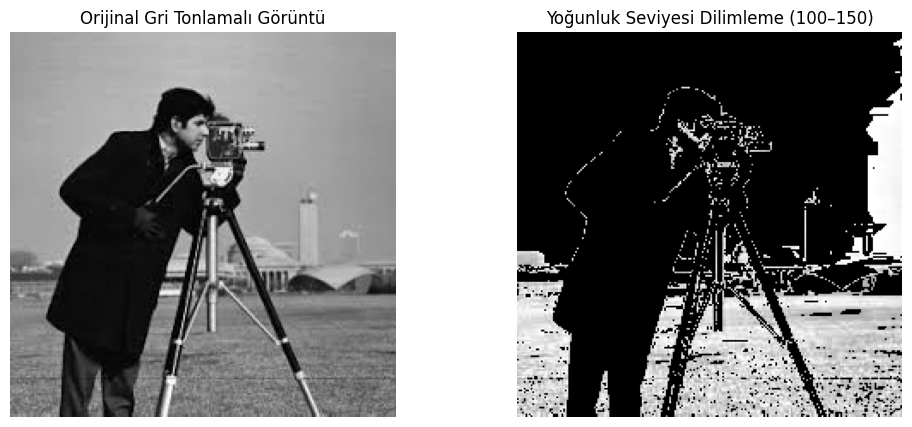

In [ ]:
# Gerekli kütüphanelerin içe aktarılması
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 8-bit gri tonlamalı görüntünün okunması
image_path = "/content/drive/MyDrive/Colab Notebooks/islem/cameraman_test_image_grayscale.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Görüntünün doğru yüklenip yüklenmediğini kontrol et
if image is None:
    raise ValueError("Görüntü yüklenemedi. Dosya yolunu kontrol ediniz.")

# 2. Yoğunluk seviyesi dilimleme için alt ve üst eşiklerin belirlenmesi
lower_bound = 100
upper_bound = 150

# Yoğunluk seviyesi dilimleme işlemi
# Belirlenen aralıkta olan pikseller korunur, diğerleri sıfırlanır
sliced_image = np.zeros_like(image)
sliced_image[(image >= lower_bound) & (image <= upper_bound)] = image[(image >= lower_bound) & (image <= upper_bound)]

# 3. Sonuçların görselleştirilmesi
plt.figure(figsize=(12, 5))

# Orijinal görüntü
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Orijinal Gri Tonlamalı Görüntü")
plt.axis("off")

# Yoğunluk seviyesi dilimlenmiş görüntü
plt.subplot(1, 2, 2)
plt.imshow(sliced_image, cmap='gray')
plt.title("Yoğunluk Seviyesi Dilimleme (100–150)")
plt.axis("off")

plt.show()
